In [ ]:
Analizando los asteroides se encontro que contienen cantidades significativas de deuterio. 
Lluego del descubrimientos se empezo a buscar indicadores de la cantidad de deuterio, los mineros
dicen que parece estar relacionado nuevamente con la cantidad de piedras violetas, 
tambien observaron un polvo violeta sobre la superficie, y un liquido amarillo.

A partir de los datos recolectados R3 tratar de predecir la cantidad de deuterio que tendrá un asteroide.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats

import seaborn as sns
import matplotlib.pyplot  as plt

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('R3.csv')

In [3]:
print(df.describe())

       violet_stone_count  violet_dust_kg  yellow_liquid_l  deuterium_l
count          100.000000      100.000000       100.000000   100.000000
mean            71.690000       21.428050        25.081757    93.605294
std             44.399403       13.536833         4.959201    20.354034
min              1.000000        0.115101        14.293236    45.845170
25%             31.500000        9.705285        21.942924    78.337857
50%             70.000000       20.558395        25.291399    92.244355
75%            109.000000       32.266034        27.688507   109.161636
max            149.000000       45.122679        37.585125   145.435825


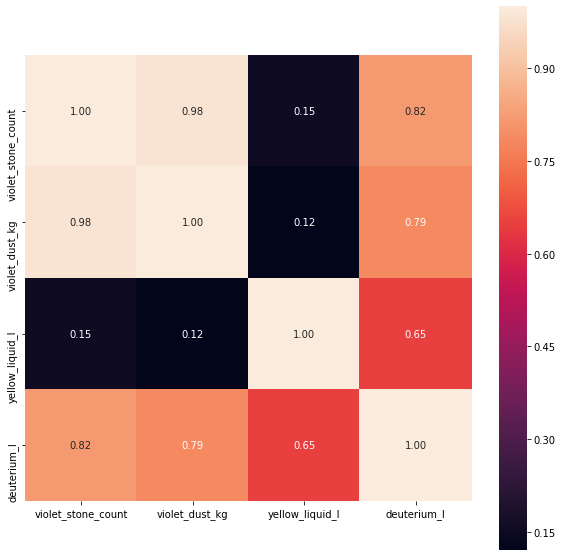

- Se observa relacion lineal entre violet_dust_kg y violet_stone_count

- Se observa relacion lineal entre deuterium y violet_stone_count
- Se observa relacion lineal entre deuterium y violet_dust_kg
- Se observa relacion lineal entre deuterium y yellow_liquid


In [4]:
# Matriz de correlaciones como heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), square=True, annot=True, fmt='.2f')
plt.show()
print("- Se observa relacion lineal entre violet_dust_kg y violet_stone_count")
print("")
print("- Se observa relacion lineal entre deuterium y violet_stone_count")
print("- Se observa relacion lineal entre deuterium y violet_dust_kg")
print("- Se observa relacion lineal entre deuterium y yellow_liquid")

## Linear Regression Assumptions 

In [ ]:
https://jeffmacaluso.github.io/post/LinearRegressionAssumptions/

In [ ]:
Assumptions
I) Linearity
II) Normality of the Error Terms
III) No Multicollinearity among Predictors
IV) No Autocorrelation of the Error Terms
V) Homoscedasticity

In [39]:
def calculate_residuals(model, features, label):
    """
    Creates predictions on the features with the model and calculates residuals
    """
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    
    return df_results

In [41]:
x = df[['violet_stone_count', 'violet_dust_kg', 'yellow_liquid_l']]
y = df.deuterium_l
regr = LinearRegression().fit(x, y)

## I) Linearity

In [40]:
def linear_assumption(model, features, label):
    """
    Linearity: Assumes that there is a linear relationship between the predictors and
               the response variable. If not, either a quadratic term or another
               algorithm should be used.
    """
    print('Assumption 1: Linear Relationship between the Target and the Feature', '\n')
        
    print('Checking with a scatter plot of actual vs. predicted.',
           'Predictions should follow the diagonal line.')
    
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)
    
    # Plotting the actual vs predicted values
    sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False, size=7)
        
    # Plotting the diagonal line
    line_coords = np.arange(df_results.min().min(), df_results.max().max())
    plt.plot(line_coords, line_coords,  # X and y points
             color='darkorange', linestyle='--')
    plt.title('Actual vs. Predicted')
    plt.show()

Assumption 1: Linear Relationship between the Target and the Feature 

Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


//anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


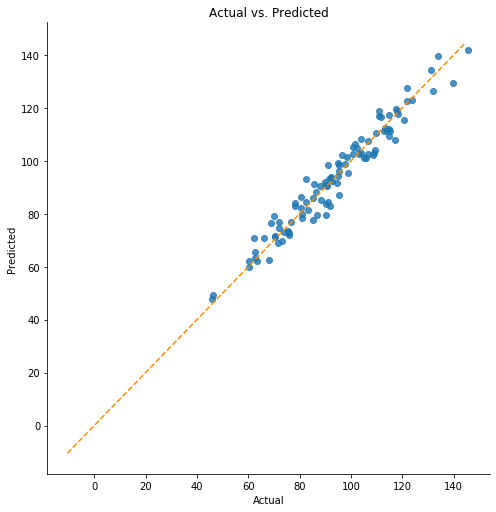

In [42]:
linear_assumption(regr, x, y)

In [ ]:
We can see a relatively even spread around the diagonal line.

## II) Normality of the Error Terms

In [43]:
def normal_errors_assumption(model, features, label, p_value_thresh=0.05):
    """
    Normality: Assumes that the error terms are normally distributed. If they are not,
    nonlinear transformations of variables may solve this.
               
    This assumption being violated primarily causes issues with the confidence intervals
    """
    from statsmodels.stats.diagnostic import normal_ad
    print('Assumption 2: The error terms are normally distributed', '\n')
    
    # Calculating residuals for the Anderson-Darling test
    # ACA PODRIA USAR OTROS TEST TAMBIEN COMO POR EJEMPLO D’Agostino’s K^2 Test o Shapiro Test.
    # AUNQUE SEGUN ESTO "https://stackoverflow.com/questions/7781798/seeing-if-data-is-normally-distributed-in-r/7788452#7788452"
    # AL NO RECHAZAR HO, NO INDICA NECESARIAMENTE NORMALIDAD EN LA DISTRIB DE LOS DATOS, POR ENDE DEBERIA
    # BUSCAR UN TEST DONDE H1 SEA LA HIPOTESIS DE QUE LA DISTRIB DE LOS DATOS SON NORMALES 
    df_results = calculate_residuals(model, features, label)
    
    print('Using the Anderson-Darling test for normal distribution')

    # Performing the test on the residuals
    p_value = normal_ad(df_results['Residuals'])[1]
    print('p-value from the test - below 0.05 generally means non-normal:', p_value)
    
    # Reporting the normality of the residuals
    if p_value < p_value_thresh:
        print('Residuals are not normally distributed')
    else:
        print('Residuals are normally distributed')
    
    # Plotting the residuals distribution
    plt.subplots(figsize=(12, 6))
    plt.title('Distribution of Residuals')
    sns.distplot(df_results['Residuals'])
    plt.show()
    
    print()
    if p_value > p_value_thresh:
        print('Assumption satisfied')
    else:
        print('Assumption not satisfied')
        print()
        print('Confidence intervals will likely be affected')
        print('Try performing nonlinear transformations on variables')

Assumption 2: The error terms are normally distributed 

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.7001234453841246
Residuals are normally distributed


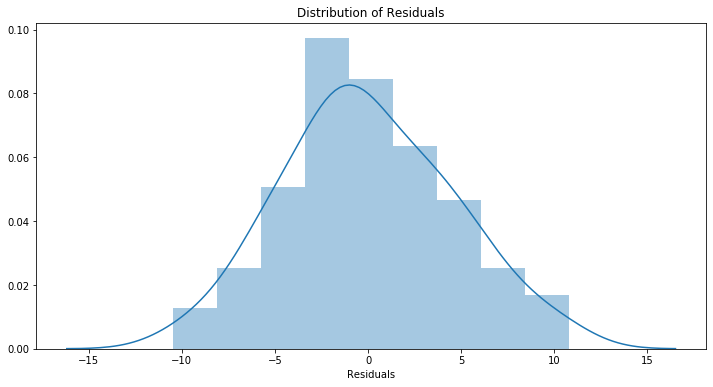


Assumption satisfied


In [44]:
normal_errors_assumption(regr, x, y)

## III) No Multicollinearity among Predictors

In [61]:
def multicollinearity_assumption(model, features, label, feature_names=None):
    """
    Multicollinearity: Assumes that predictors are not correlated with each other. If there is
                       correlation among the predictors, then either remove prepdictors with high
                       Variance Inflation Factor (VIF) values or perform dimensionality reduction
                           
                       This assumption being violated causes issues with interpretability of the 
                       coefficients and the standard errors of the coefficients.
    """
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    print('Assumption 3: Little to no multicollinearity among predictors')
        
    # Plotting the heatmap
    plt.figure(figsize = (10,8))
    sns.heatmap(pd.DataFrame(features).corr(), annot=True)
    plt.title('Correlation of Variables')
    plt.show()
        
    print('Variance Inflation Factors (VIF)')
    print('> 10: An indication that multicollinearity may be present')
    print('> 100: Certain multicollinearity among the variables')
    print('-------------------------------------')
       
    # Gathering the VIF for each variable
    VIF = [variance_inflation_factor(features.to_numpy(), i) for i in range(features.shape[1])]
    for idx, vif in enumerate(VIF):
        print('{0}: {1}'.format(feature_names[idx], vif))
        
    # Gathering and printing total cases of possible or definite multicollinearity
    possible_multicollinearity = sum([1 for vif in VIF if vif > 10])
    definite_multicollinearity = sum([1 for vif in VIF if vif > 100])
    print()
    print('{0} cases of possible multicollinearity'.format(possible_multicollinearity))
    print('{0} cases of definite multicollinearity'.format(definite_multicollinearity))
    print()

    if definite_multicollinearity == 0:
        if possible_multicollinearity == 0:
            print('Assumption satisfied')
        else:
            print('Assumption possibly satisfied')
            print()
            print('Coefficient interpretability may be problematic')
            print('Consider removing variables with a high Variance Inflation Factor (VIF)')

    else:
        print('Assumption not satisfied')
        print()
        print('Coefficient interpretability will be problematic')
        print('Consider removing variables with a high Variance Inflation Factor (VIF)')

Assumption 3: Little to no multicollinearity among predictors


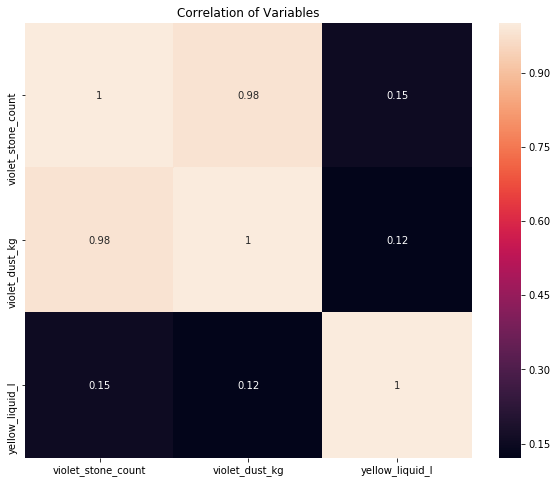

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
X1: 102.45570159440325
X2: 97.8631601763722
X3: 3.635586473540365

2 cases of possible multicollinearity
1 cases of definite multicollinearity

Assumption not satisfied

Coefficient interpretability will be problematic
Consider removing variables with a high Variance Inflation Factor (VIF)


In [65]:
linear_feature_names = ['X'+str(feature+1) for feature in range(x.shape[1])]
multicollinearity_assumption(regr, x, y, linear_feature_names)

Assumption 3: Little to no multicollinearity among predictors


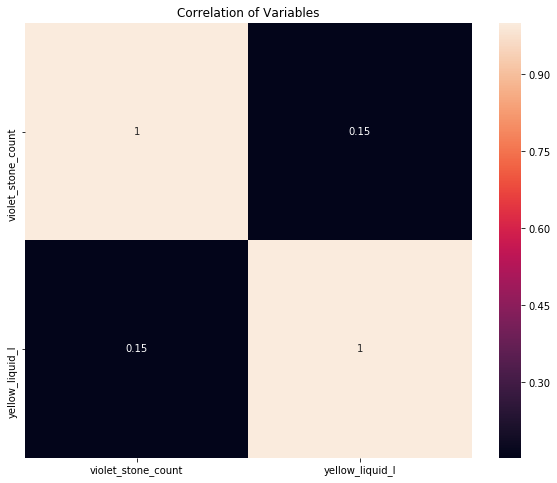

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
X1: 3.621825472193305
X2: 3.621825472193305

0 cases of possible multicollinearity
0 cases of definite multicollinearity

Assumption satisfied


In [64]:
x_ = df[['violet_stone_count', 'yellow_liquid_l']]
linear_feature_names = ['X'+str(feature+1) for feature in range(x_.shape[1])]
multicollinearity_assumption(regr, x_, y, linear_feature_names)

## IV) No Autocorrelation of the Error Terms 

In [66]:
def autocorrelation_assumption(model, features, label):
    """
    Autocorrelation: Assumes that there is no autocorrelation in the residuals. If there is
                     autocorrelation, then there is a pattern that is not explained due to
                     the current value being dependent on the previous value.
                     This may be resolved by adding a lag variable of either the dependent
                     variable or some of the predictors.
    """
    from statsmodels.stats.stattools import durbin_watson
    print('Assumption 4: No Autocorrelation', '\n')
    
    # Calculating residuals for the Durbin Watson-tests
    df_results = calculate_residuals(model, features, label)

    print('\nPerforming Durbin-Watson Test')
    print('Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data')
    print('0 to 2< is positive autocorrelation')
    print('>2 to 4 is negative autocorrelation')
    print('-------------------------------------')
    durbinWatson = durbin_watson(df_results['Residuals'])
    print('Durbin-Watson:', durbinWatson)
    if durbinWatson < 1.5:
        print('Signs of positive autocorrelation', '\n')
        print('Assumption not satisfied')
    elif durbinWatson > 2.5:
        print('Signs of negative autocorrelation', '\n')
        print('Assumption not satisfied')
    else:
        print('Little to no autocorrelation', '\n')
        print('Assumption satisfied')

In [67]:
autocorrelation_assumption(regr, x, y)

Assumption 4: No Autocorrelation 


Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 1.5722531705498028
Little to no autocorrelation 

Assumption satisfied


## V) Homoscedasticity  

In [68]:
def homoscedasticity_assumption(model, features, label):
    """
    Homoscedasticity: Assumes that the errors exhibit constant variance
    """
    print('Assumption 5: Homoscedasticity of Error Terms', '\n')
    
    print('Residuals should have relative constant variance')
        
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)

    # Plotting the residuals
    plt.subplots(figsize=(12, 6))
    ax = plt.subplot(111)  # To remove spines
    plt.scatter(x=df_results.index, y=df_results.Residuals, alpha=0.5)
    plt.plot(np.repeat(0, df_results.index.max()), color='darkorange', linestyle='--')
    ax.spines['right'].set_visible(False)  # Removing the right spine
    ax.spines['top'].set_visible(False)  # Removing the top spine
    plt.title('Residuals')
    plt.show()  

Assumption 5: Homoscedasticity of Error Terms 

Residuals should have relative constant variance


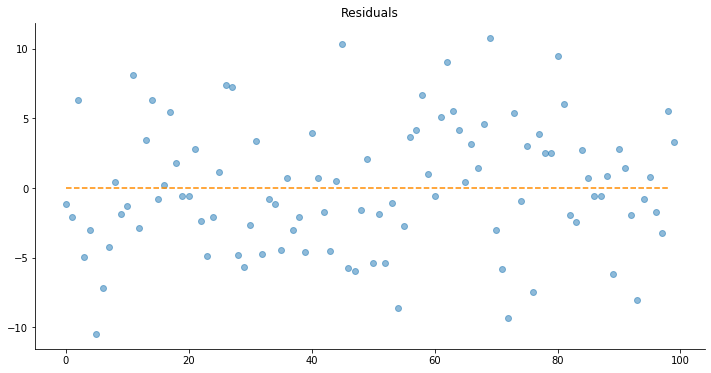

- There don’t appear to be any obvious problems with that.


In [71]:
homoscedasticity_assumption(regr, x, y)
print("- There don’t appear to be any obvious problems with that.")

## Entreno modelo 

In [ ]:
def print_model_statistics(regr, y_test, y_pred):

    # The coefficients
    print('Coefficients: ', regr.coef_)

    # The intercept_ 
    print('Intercept (Y axis when X = 0): ', regr.intercept_)

    # The mean squared error
    print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

    # The coefficient of determination: 1 is perfect prediction
    print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

In [12]:
X = df[['violet_stone_count', 'violet_dust_kg', 'yellow_liquid_l']]
y = df.deuterium_l

seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [26]:
regr = LinearRegression().fit(X_train, y_train)
y_pred = regr.predict(X_test)

print_model_statistics(regr, y_test, y_pred)

print()
print('- A negative coefficient makes no sense, this is due to the multicollinearity in the data set.')

Coefficients:  [ 0.35807815 -0.06084672  2.31152962]
Intercept (Y axis when X = 0):  11.262507292472776
Mean squared error: 25.69
Coefficient of determination: 0.95

- A negative coefficient makes no sense, this is due to the multicollinearity in the data set.


In [ ]:
# remuevo 'violet_stone_count' para eliminar multicolinearidad

In [34]:
X = df[['violet_dust_kg', 'yellow_liquid_l']]
y = df.deuterium_l

seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [35]:
regr = LinearRegression().fit(X_train, y_train)
y_pred = regr.predict(X_test)

print_model_statistics(regr, y_test, y_pred)

Coefficients:  [1.06642541 2.35959764]
Intercept (Y axis when X = 0):  11.801804861072881
Mean squared error: 35.31
Coefficient of determination: 0.93


In [ ]:
# remuevo 'violet_dust_kg' para eliminar multicolinearidad

In [36]:
X = df[['violet_stone_count', 'yellow_liquid_l']]
y = df.deuterium_l

seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [37]:
regr = LinearRegression().fit(X_train, y_train)
y_pred = regr.predict(X_test)

print_model_statistics(regr, y_test, y_pred)

Coefficients:  [0.33943225 2.31390072]
Intercept (Y axis when X = 0):  11.244986826136
Mean squared error: 25.68
Coefficient of determination: 0.95


In [38]:
print("- El modelo sera entrenado con los features ['violet_stone_count', 'yellow_liquid_l']")
print("  por devolver mejores valores en las metricas Mean squared error y r2_score")

- El modelo sera entrenado con los features ['violet_stone_count', 'yellow_liquid_l']
  por devolver mejores valores en las metricas Mean squared error y r2_score
